# **Ex1:**

## A ) Avec la bibliothèque matplotlib on veut reproduire la même chose que le graphique 1.

Il faudra mettre en place une fonction cercle(x0,y0,r) permettant de tracer le cercle de centre (x0,
y0) et de rayon r.

In [35]:
import numpy as np
import matplotlib.pyplot as plt

On commence par importer pyplot de matplotlib.
On importe également numpy qui est un module servant à faire des matrices, nous allons nous en servir ici pour définir les points.

Avec la formule d'un cercle `(x-x0)² + (y-y0)² = r²`, avec r le rayon et (x0, y0) les coordonnées du centre, on peut facilement exprimer x et y en fonction de x0, y0 et r :

`x = r * cos(a) + x0`

`y = r * cos(a) + y0`

Pour "a" compris entre 0 et 2pi.

On définit donc la fonction cercle comme suit :

In [36]:
def cercle(x0, y0, r):
    theta = np.linspace(0, 2 * np.pi, 100)
    x = r * np.cos(theta) + x0
    y = r * np.sin(theta) + y0
    plt.plot(x, y)
    plt.axis("equal")

plt.axis("equal") permet de mettre les axes à l'échelle et donc de ne pas déformer les cercles.
plt.plot(x, y) permet d'ajouter le cercle à la figure (en prenant chaque valeur de x comme abscisse et chaque valeur de y comme ordonnée.

np.linspace() est une méthode de numpy servant à créer une matrice ligne contenant des valeurs réparties équitablement entre deux valeurs saisies (ici 0 et 2 pi). Le dernier paramètre sert à définir le nombre de points que l'on veut sur l'intervalle. On peut, pour l'exemple créer une matrice ligne contenant 10 valeurs équitablement réparties entre 0 et 10 :

In [37]:
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

`x = r * np.cos(theta) + x0` est une opération permettant d'optenir une nouvelle matrice ligne. x ici est bien une matrice ligne, pour laquelle on a appriqué `np.cos(theta) + x0` pour chaque valeur comprise dans theta.

Pour un exemple plus parlant, si on a `theta = np.linspace(1, 3, 3)`

et que l'on fait `"x = theta + 1"`

Alors, theta sera égal à `[1 2 3]`, et x `[2, 3, 4]`. On à appliqué `+1` à chaque valeur de theta pour faire x.

Pour le programme principal, il suffit de créer une boucle créant les cercles demandés. Les cercles demandés sont tous centrés en (10, 10), il y a 9 cercles et ils ont un rayon variant de 1 à 9. On fait donc la boucle suivante :

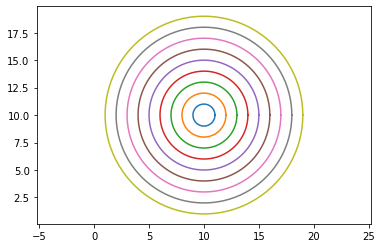

In [38]:
for r in range(1, 10):
    cercle(10, 10, r)
plt.show()

Nous faisons donc des cercles centrés en (10, 10), avec un rayon variant de 1 à 9.
(range(1, 10) va bien de 1 à 9)

Une fois la figure construite, on la montre avec plt.show()

## B ) Même exercice que le A, avec le graphique 2

Dans un premier temps nous savons que nous allons devoir réutiliser notre fonction cercle.

Pour construire le nouveau graphique, il suffit de l'analyser :

On peut le voir comme des lignes de cercles. Chaque ligne contient un cercle de moins que celle du dessous. Chaque cercle est de `rayon 1`. Les centres des cercles de la même ligne ont un `décalage d'abscisse de +2` et ont la même ordonnée par rapport aux cercles d'à côté. Les centres des cercles d'une ligne à celle du dessus ont un `décalage d'ordonnée de +2`. Le premier cercle de la première ligne part de `(0, 0)`. Le premier cercle de chaque ligne du dessus à un `décalage d'abscisse de +1` par rapport au premier cercle de la ligne précédente, et le dernier cercle de chaque ligne à un `décalage d'abscisse de -1` par rapport à chaque cercle de la ligne précédente. Une fois en code on obtien ceci :

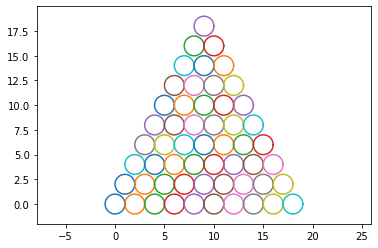

In [39]:
for y0 in range(0, 20, 2):
    for x0 in range(y0 // 2, 20 - y0 // 2, 2):
        cercle(x0, y0, 1)
plt.show()

L'ordonnée y0 varie de 0 à 18 avec un pas de 2, on écrit donc for `y0 in range(0, 20, 2)`, 0 est le début, 2 est le pas et  20 est la limite (qui ne sera pas atteinte, donc on s'arrête bien à 18).

L'abscisse x0 à également un pas de 2 mais les premières et dernières valeurs varient :

La première ligne (ordonnée = 0) à un décalage de +0 avec l'abscisse 0, la deuxième (ordonnée = 2) à un décalage de +1 par rapport à l'abscisse 0. On remarque ainsi que L'abscisse du premier cercle d'une ligne est égale à la moitié de l'ordonnée de cette même ligne. 
Pour l'abscisse du dernier cercle on raisonne de la même manière, s'il y à un décalage de +1 pour l'abscisse du premier cercle d'une ligne, il y a un décalage de -1 pour le dernier cercle. On applique donc le même raisonnement mais inverse, on enlève à chaque fois la moitié de l'ordonnée, en partant de 18 car le dernier cercle de la première ligne a pour abscisse 18. (On met `20 - y0 // 2` car la valeur "20" est la limite et n'est pas atteinte, le maximum est bien 18). Le double slash `a//b` sert à faire une division euclidienne, donnant un entier car la fonction range() n'accèpte que les entiers.

# **Ex2:**

## Ecrire un programme qui stocke et affiche les valeurs de cos(x) et x allant de -5 à 5 avec une incrémentation de 1.

### A ) Ecrire une fonction ecrire() qui permet de stocker les résultats dans un fichier math.csv.

On commence par importer les modules dont nous avons besoin :

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

On définit par la suite la fonction ecrire, qui prend en paramètre un dictionnaire de données, avec les clés de ce dictionnaire étant les nom des colonnes (nom du type de données) à fournir dans le fichier csv, et les valeur du dictionnaire étant les valeurs correspondant à chaque colonne.

on précise ici le nom des colonnes avec `columns=['x', 'cosx']`, (en pratique cette opération se fait toute seule, si on ne précise pas les colonnes, la fonction choisira comme nom de colonne les clés du dictionnaire.
On exporte ensuit les données avec "data.to_csv('math.csv', index=False)". 

`index=False` permet de ne pas mettre de séparateur au début du fichier (on ne veut ici pas de séparateur avant le premier élément que nous allons écrire dans le fichier.

In [41]:
def ecrire(dico_donnees):
    data = pd.DataFrame(dico_donnees, columns=['x', 'cosx'])
    data.to_csv('math.csv', index=False)

### B ) Ecrire une fonction lire() qui permet de lire le fichier math.csv et d’afficher le résultat grâce à
matplotlib.

On écrit ensuite la fonction lire qui lit les données. 
`data = pd.read_csv('math.csv', delimiter=',')` permet de récupérer les données dans une variable, on précise le délimiteur, ici il s'agit de la virgule `,` car c'est le délimiteur par défaut, c'est donc celui utilisé dans le fichier car nous n'en avons pas défini d'autre.

On récupère ensuite chaque ensemble de données :

`abscisse = data.x`

`ordonnee = data.cosx`

Et on ajoute enfin les données à la figure. On finit par afficher la figure :

In [42]:
def lire():
    data = pd.read_csv('math.csv', delimiter=',')
    abscisse = data.x
    ordonnee = data.cosx
    plt.plot(abscisse, ordonnee, label="cos(x)")
    plt.legend()
    plt.show()

Pour des valeurs de x allant de -5 à 5 avec une incrémentation de 1, on prends 11 points de -5 à 5 réparties équitablement :

In [43]:
np.linspace(-5, 5, 11)

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

On construit ainsi x, cosx en appliquant cos(x) à chaque valeur de x, on met les données dans un dictionnaire et on applique ensuite nos foncitons.

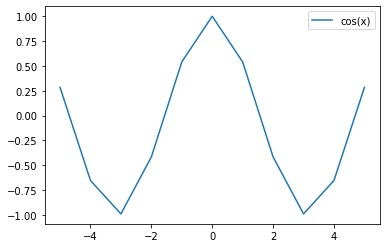

In [44]:
x = np.linspace(-5, 5, 11)
cosx = np.cos(x)
dico_cos = {'x': x, 'cosx': cosx}
ecrire(dico_cos)
lire()

Nous pouvons voir que l'incrémentation de 1 donne des courbes peu précises. En diminuant l'espace entre les points (et donc en créant plus de points) on peut obtenir une courbe plus précise :

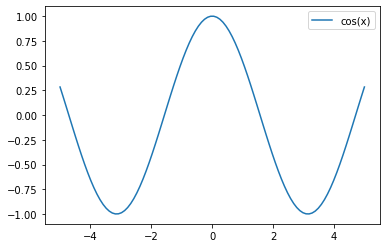

In [45]:
x = np.linspace(-5, 5, 100)
cosx = np.cos(x)

dico_cos = {'x': x, 'cosx': cosx}
ecrire(dico_cos)
lire()

# **Ex3:**

## Soit un fichier typé intitulé concours.txt qui comporte les enregistrements relatifs aux candidats d’un concours. Chaque enregistrement est composé de : NCIN, NOM, PRENOM, AGE, DECISION : (type contenant les identificateurs suivants : admis, refusé, ajourné), et séparé par point virgule (;).

On commence par importer les modules dont nous avons besoin :

In [46]:
import matplotlib.pyplot as plt

### 1.Définir la fonction saisir() qui permet de remplir les données relatives aux candidats dans le fichier concours.txt

Le nombre de candidats à entrer étant indéterminé, on utilise une variable "saisir" pour demander à l'utilisateur si il veut continuer de saisir des candidats après en avoir entré (On applique `.lower()` à sa réponse pour accepter "o" ou "O")
On ouvre le fichier en mode écriture (`"w"`) et avec `with open`, ce qui permet de ne pas avoir à le fermer.
On fait ensuite saisir à l'utilisateur chaque paramètre. Pour être sûr que "decision" soit conforme, on fait une boucle demandant de saisir jusqu'à ce que la valeur soit conforme. On assemble ensuite les valeurs dans une chaîne, en les séparant par des points virgule comme demandé, et en terminant par un retour à la ligne `\n`. On écrit ensuite cette ligne dans le fichier.

In [47]:
def saisir():
    saisir = True
    with open("concours.txt", "w") as fichier:
        while saisir:
            ncin = input("NCIN : ")
            nom = input("Nom : ")
            prenom = input("Prénom : ")
            age = input("Âge : ")
            decision = ""
            while decision not in {"admis", "refusé", "ajourné"}:
                decision = input("Décision (admis, refusé, ajourné) : ")
                decision = decision.lower()
            ligne = f"{ncin};{nom};{prenom};{age};{decision}\n"
            fichier.write(ligne)
            saisir = input("Continuer ? (O/N) : ").lower() == "o"

### 2.Définir la fonction admis() qui permet créer le fichier admis.txt comportant les données relatives aux candidat admis

On ouvre chaque fichier avec `with open` pour ne pas avoir à se soucier de leur fermeture.
On ouvre le fichier `concours.txt` en mode lecture (`"r"`) car nous voulons seulement lire ses données. On ouvre un nouveau fichier `admis.txt` en mode écriture qui contiendra les candidats admis. On lit ensuite ligne par ligne (et donc candidat par candidat) le fichier `concours.txt`, On fait ensuite une liste avec cette ligne, en utilisant le séparateur `;` que nous avons défini auparavant. On ajoute ensuite le candidat que si la cinquième valeur de la liste (`infos_candidats[4]`) est égale à "`admis`". On applique `.strip()` pour enlever le retour à la ligne que nous avons mis en place pour la fonction précédente.

In [48]:
def admis():
    with open("concours.txt", "r") as f1:
        with open("admis.txt", "w") as f2:
            for candidat in f1:
                infos_candidat = candidat.split(";")
                if infos_candidat[4].strip() == "admis":
                    f2.write(candidat)

### 3.Afin de sélectionner en priorité les candidats admis et âgés moins de 30 ans, créer la fonction attente() qui produira à partir du fichier admis.txt, un nouveau fichier intitulé attente.txt comportant les données relatives aux candidats admis et âgés plus que 30 ans. Une ligne du fichier attente.txt comprend le NCIN, le NOM et PRENOM d’un candidat séparés par point virgule (;).

Comme précédemment, on utilise `with open` pour l'ouverture des fichiers. On veut seulement lire les informations de `admis.txt` et on veut créer et écrire dans `attente.txt`. On les ouvre donc respectivement en mode lecture et écriture. On récupère les informations de la même manière que pour la fonction précédente, à la différence près que cette fois-ci c'est l'âge qui devient le critère de selection, à savoir le quatrième élément de la liste, donc ici `infos_candidat[3]`, élément auquel on a appliqué la fonction `int()` car l'âge est stocké sous forme de chaîne de caractère, il faut donc le convertir en entier pour pouvoir le comparer à 30. Comme demandé, on enregisre uniquement le NCIN, nom et prénom, donc ni l'âge ni la décision (de toute façon tous les candidats dans cette liste sont des candidats admis).

In [49]:
def attente():
    with open("admis.txt", "r") as f1:
        with open("attente.txt", "w") as f2:
            for candidat in f1:
                infos_candidat = candidat.split(";")
                if int(infos_candidat[3]) > 30:
                    candidat_attente = f"{infos_candidat[0]};{infos_candidat[1]};{infos_candidat[2]}\n"
                    f2.write(candidat_attente)

### 4.Définir la fonction statistiques(dec) qui permet de retourner le pourcentage des candidats pour la décision dec (admis, refusé et ajourné). Exemple :Le pourcentage des candidats admis = (Nombre des candidats admis / Nombre des candidats) *100. Il faudra avec matplotlib afficher un camenbert ( Candidats admis, refusé et ajourné ). Pour vous aider, voici ce site : http://www.python-simple.com/pythonmatplotlib/pie.php .

Comme précedemment, on ouvre le fichier `concours.txt` avec `with open`, et en mode lecture comme nous voulons uniquement récupérer les informations qu'il contient. On récupères tous les candidats en même dans et dans une liste avec `liste_candidats = fichier.readlines()`. On crée ensuite trois liste, une pour les candidats admis, une pour les ajournés et une pour ceux refusés. Le tri se fait ensuite de la même manière que pour la fonction `admis()`, à la différence près qu'ici on stocke chaque résultat dans une liste et que on ne s'intéresse pas qu'aux admis mais à tous les status possibles de décision. Le nombre de candidats ayant eu une décision (*ex : admis*) correspondra donc ici à la longueur de la liste correspondant à cette décision, (*ex : `len(candidats_admis)`*). Le nombre de candidats en tout sera égal à la longueur de la liste du nombre total de candidats, ici `liste_candidats`. Pour obtenir des stats sur une décision, on renvoie donc le nombre de candidats ayant eu cette décision, divisé par le nombre de candidats total, le tout multiplié par 100 pour avoir un résultat en pourcentage. En fonction de la décision demandée (`dec`, passé en paramètre), on renvoit la stat correspondante.

On définit par la suite une fonction `camembert()` qui va dessiner la figure contenant toutes les statistiques. On utilise la synthace fournie dans la documentation en énoncé de l'exercice, on récupère les statistiques de chaque décision à l'aide de la fonction que nous venons de créer et nous nous servons de ces données pour constuire la figure.

In [50]:
def statistiques(dec):
    with open("concours.txt", 'r') as fichier:
        liste_candidats = fichier.readlines()
    candidats_admis = []
    candidats_refuses = []
    candidats_ajournes = []
    for candidat in liste_candidats:
        infos_candidat = candidat.split(";")
        if infos_candidat[4].strip() == "admis":
            candidats_admis.append(candidat)
        elif infos_candidat[4].strip() == "refusé":
            candidats_refuses.append(candidat)
        else:
            candidats_ajournes.append(candidat)

    if dec == "admis":
        return (len(candidats_admis) / len(liste_candidats)) * 100
    elif dec == "refusé":
        return (len(candidats_refuses) / len(liste_candidats)) * 100
    else:
        return (len(candidats_ajournes) / len(liste_candidats)) * 100

In [51]:
def camembert():
    plt.figure(figsize=(8, 8))
    stats = [statistiques('admis'), statistiques("ajournes"), statistiques("refuses")]
    plt.pie(stats, labels=['Admis', 'Ajournés','Refusés'],
            normalize=True,
            colors=['green', 'orange', 'red'],
            autopct=lambda x: f"{round(x, 2)} %")
    plt.legend()
    plt.show()

### 5.Définir la fonction supprimer() qui supprimera du fichier admis.txt les candidat âgés plus de 30 ans.

Ici, comme le fichier de lecture et le fichier d'arrivée sont le même fichier, on doit procéder en deux temps. On commence par lire le fichier et dresser une liste des candidats à ne pas supprimer (séléction identique à celle de la fonction `attente()` à la différence près que cette fois ci on inverse le critère de séléction, qui est `<= 30` au lieu de `>30`. On stocke bien entendu les candidats de moins de 30 ans dans une liste (on ne peut pas écrire directement dans le fichier car ce dernier est déjà ouvert en mode lecture).

Dans un deuxième temps on ajoute chaque élément de la liste, chaque candidat correspondant au critère de séléction au fichier `admis.txt`, qui a donc été réécri à partir de 0. Nous n'avons donc pas directement supprimé les candidats âgés de plus de 30 ans, nous avons mis de côté ceux âgés de 30 ans ou moins, puis nous avons redéfini la liste des candidats admis en n'y mettant que ceux que nous avions mit de côté, ce qui revient donc à supprimer les candidats de plus de 30 ans.

Les opérations sur les fichiers sont bien entendu effectuées avec `with open`, la première en mode lecture et la deuxième en mode écriture.

In [52]:
def supprimer():
    with open("admis.txt", 'r') as fichier:
        candidats_admis = []
        for candidat in fichier:
            candidat_infos = candidat.split(";")
            if int(candidat_infos[3]) <= 30:
                candidats_admis.append(candidat)

    with open("admis.txt", "w") as fichier:
        for candidat in candidats_admis:
            fichier.write(candidat)

On peut donc maintenant tester l'ensemble de nos fonction pour nous assurer que tout fonctionne correctement. On ne voit ici pas la fonction `statistiques(dec)`, mais elle est pourtant bien présente car utilisée dans `camembert()`. Vu la suppression finale avec `supprimer()` et l'ordre d'utilisation des fonctions, les trois fichiers `concours.txt`, `attente.txt` et `admis.txt` contiennent **respectivement** la `liste de tous les candidats`, la `liste des candidats admis de plus de 30 ans` (avec toutes leurs informations sauf leur âge et la décision), la `liste des candidats admis de 30 ans ou moins`. 

Nous pouvons également voir que lors de la saisie des candidats, on accepte la décision si elle contient une majuscule (d'où le `.lower()`), et la décision est redemandée si elle n'est pas confirme, d'où la boucle que nous avons mis en place.

NCIN :  123456
Nom :  Wayne
Prénom :  Bruce
Âge :  45
Décision (admis, refusé, ajourné) :  admis
Continuer ? (O/N) :  O
NCIN :  654321
Nom :  Parker
Prénom :  Peter
Âge :  25
Décision (admis, refusé, ajourné) :  admis
Continuer ? (O/N) :  O
NCIN :  987654
Nom :  Rogers
Prénom :  Steve
Âge :  32
Décision (admis, refusé, ajourné) :  admi
Décision (admis, refusé, ajourné) :  admis
Continuer ? (O/N) :  O
NCIN :  98741
Nom :  Wilson
Prénom :  Wade
Âge :  22
Décision (admis, refusé, ajourné) :  Admis
Continuer ? (O/N) :  O
NCIN :  54875
Nom :  Lehnsherr
Prénom :  Erik
Âge :  23
Décision (admis, refusé, ajourné) :  admis
Continuer ? (O/N) :  O
NCIN :  536241
Nom :  Kyle
Prénom :  Selina
Âge :  24
Décision (admis, refusé, ajourné) :  ajourné
Continuer ? (O/N) :  O
NCIN :  587469
Nom :  Brock
Prénom :  Eddie
Âge :  32
Décision (admis, refusé, ajourné) :  ajourné
Continuer ? (O/N) :  O
NCIN :  852147
Nom :  Kent
Prénom :  Clark
Âge :  24
Décision (admis, refusé, ajourné) :  refusé
Continuer ? (O

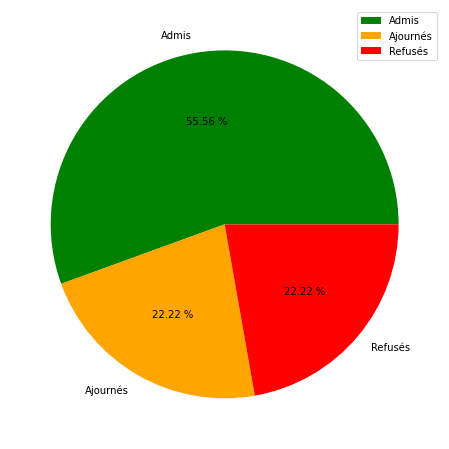

In [53]:
saisir()
admis()
attente()
camembert()
supprimer()